# Data Conditioning

This notebook looks at basic statistics of the data. It determines the median and mean for each feature and assesses the skewness of the variables.

In [93]:
# Libraries
library(dplyr)
library(moments)
library(repr)
library(ggplot2)
library(gridExtra)
options(repr.plot.height = 2)

In [87]:
# 00. Acquire the Data Set
bostonURL <- url("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
boston <- read.table(bostonURL)
colnames(boston) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV")
attach(boston)

The following objects are masked from bostonScaled:

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from boston (pos = 4):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from boston (pos = 5):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from boston (pos = 6):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN



### Boston Data Set Statistics

In [88]:
# Boston Data Set Statistics
bostonStats <- data.frame(feature = colnames(boston))
bostonStats['mean'] <- sapply(boston, mean)
bostonStats['sd'] = sapply(boston, sd)
bostonStats['skewness'] <- sapply(boston, skewness)
bostonStats['kurtosis'] <- sapply(boston, kurtosis)
bostonStats

feature,mean,sd,skewness,kurtosis
CRIM,3.61352356,8.6015451,5.2076524,39.752786
ZN,11.36363636,23.3224530,2.2190631,6.979949
INDUS,11.13677866,6.8603529,0.2941463,1.766782
CHAS,0.06916996,0.2539940,3.3957993,12.531453
NOX,0.55469506,0.1158777,0.7271442,2.924136
RM,6.28463439,0.7026171,0.4024147,4.861027
AGE,68.57490119,28.1488614,-0.5971856,2.029986
DIS,3.79504269,2.1057101,1.0087788,3.471299
RAD,9.54940711,8.7072594,1.0018335,2.129479
TAX,408.23715415,168.5371161,0.6679683,1.857015


### Distribution Plots

The following are the distribution plots of each feature. Blue indicates median whereas red indicates mean.

In [89]:
# This function plots the distribution plots of two features side by side
special_plot2 <- function (feature1, feature2) {
    
    p1 <- qplot(feature1, geom="histogram", bins=200, alpha=I(.4),) +
        geom_vline(aes(xintercept=mean(feature1)), color="red", linetype="dashed", size=1) +
        geom_vline(aes(xintercept=median(feature1)), color="blue", linetype="dashed", size=1) +
        ggtitle(paste(" Distribution of", deparse(substitute(feature1)))) + 
        theme(plot.title = element_text(size=10, face = "bold"), text = element_text(size=8)) +
        xlab(deparse(substitute(feature1))) +
        ylab("Count")
    
    
    p2 <- qplot(feature2, geom="histogram", bins=200, alpha=I(.4),)+
        geom_vline(aes(xintercept=mean(feature2)), color="red", linetype="dashed", size=1)+
        geom_vline(aes(xintercept=median(feature2)), color="blue", linetype="dashed", size=1)+
        ggtitle(paste(" Distribution of", deparse(substitute(feature2)))) + 
        theme(plot.title = element_text(size=10, face = "bold"), text = element_text(size=8)) +
        xlab(deparse(substitute(feature2))) +
        ylab("Count")
    
    grid.arrange(p1, p2, ncol=2)
}    

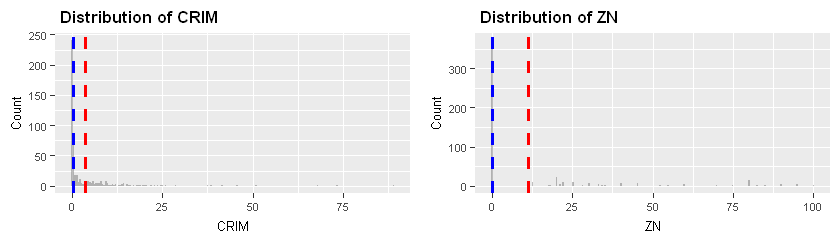

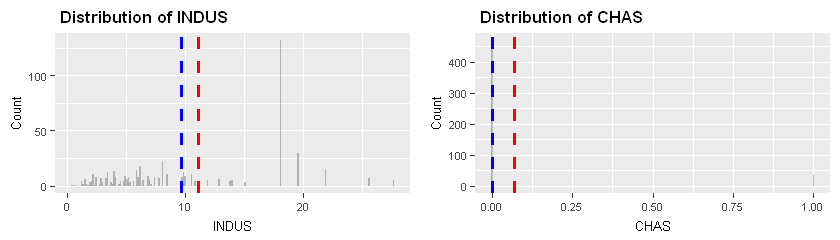

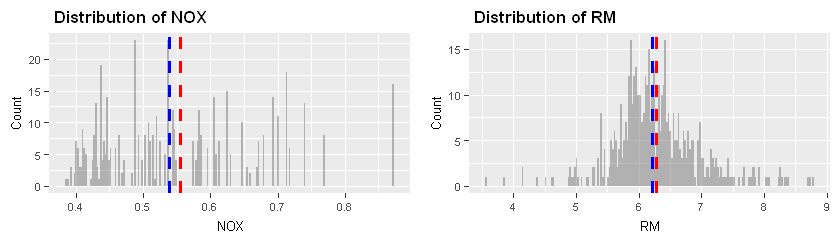

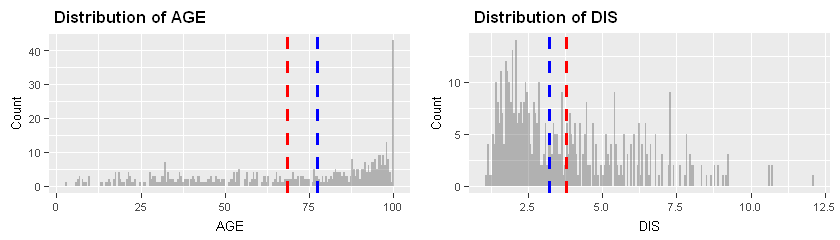

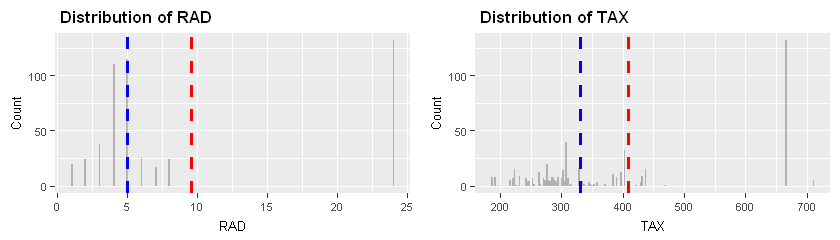

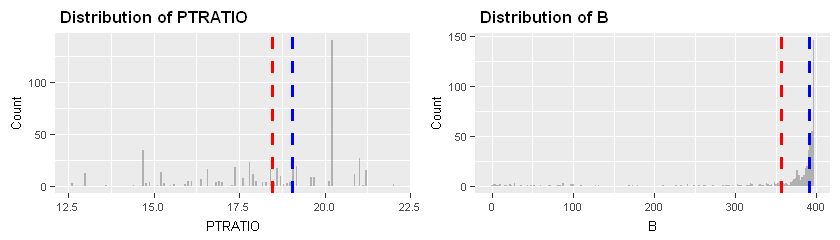

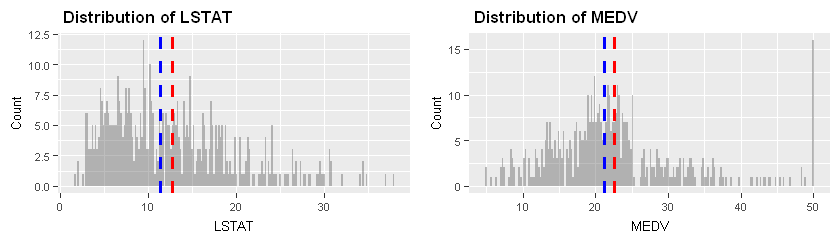

In [90]:
special_plot2(CRIM, ZN)
special_plot2(INDUS, CHAS)
special_plot2(NOX, RM)
special_plot2(AGE, DIS)
special_plot2(RAD, TAX)
special_plot2(PTRATIO, B)
special_plot2(LSTAT, MEDV)

### Skewness

You can assess the plots skewness by looking at where the mean and median falls.   
If the mean > median, then the values are right or positively skewed.   
If the mean < median, then the values are left or negatively skewed.  

For example, we can see that CRIM and DIS are positively skewed whereas B and AGE are negatively skewed.

### Standardizing the Data

Using scale() standardizes the dataset. Notice how all the standard deviations are equal to 1. The mean changes but the skewness and kurtosis does not.

In [91]:
# Scaled Boston Data Set Statistics
detach(boston)
bostonScaled <- data.frame(scale(boston))
bostonStats['mean_scaled'] <- sapply(bostonScaled, mean)
bostonStats['sd_scaled'] = sapply(bostonScaled, sd)
bostonStats['skewness_scaled'] <- sapply(bostonScaled, skewness)
bostonStats['kurtosis_scaled'] <- sapply(bostonScaled, kurtosis)
bostonStats

feature,mean,sd,skewness,kurtosis,mean_scaled,sd_scaled,skewness_scaled,kurtosis_scaled
CRIM,3.61352356,8.6015451,5.2076524,39.752786,-7.202981e-18,1,5.2076524,39.752786
ZN,11.36363636,23.3224530,2.2190631,6.979949,2.282481e-17,1,2.2190631,6.979949
INDUS,11.13677866,6.8603529,0.2941463,1.766782,1.595296e-17,1,0.2941463,1.766782
CHAS,0.06916996,0.2539940,3.3957993,12.531453,-3.544441e-18,1,3.3957993,12.531453
NOX,0.55469506,0.1158777,0.7271442,2.924136,-2.150022e-16,1,0.7271442,2.924136
RM,6.28463439,0.7026171,0.4024147,4.861027,-1.056462e-16,1,0.4024147,4.861027
AGE,68.57490119,28.1488614,-0.5971856,2.029986,-1.643357e-16,1,-0.5971856,2.029986
DIS,3.79504269,2.1057101,1.0087788,3.471299,1.153079e-16,1,1.0087788,3.471299
RAD,9.54940711,8.7072594,1.0018335,2.129479,4.799652e-17,1,1.0018335,2.129479
TAX,408.23715415,168.5371161,0.6679683,1.857015,2.024415e-17,1,0.6679683,1.857015


The following objects are masked from bostonScaled (pos = 3):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from boston (pos = 4):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from boston (pos = 5):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from boston (pos = 6):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN



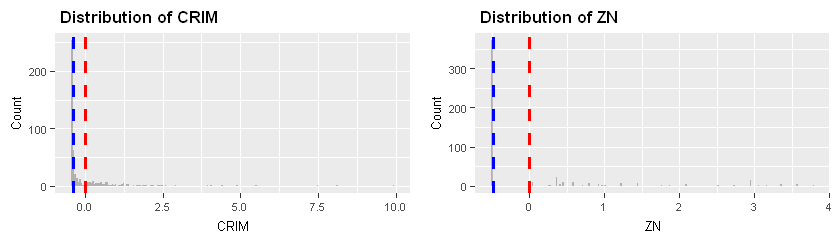

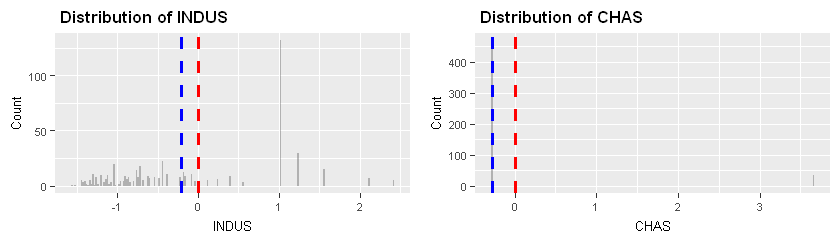

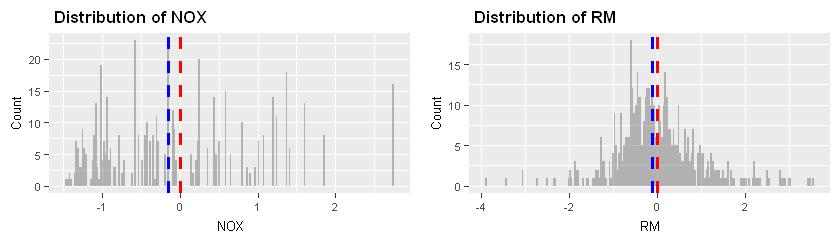

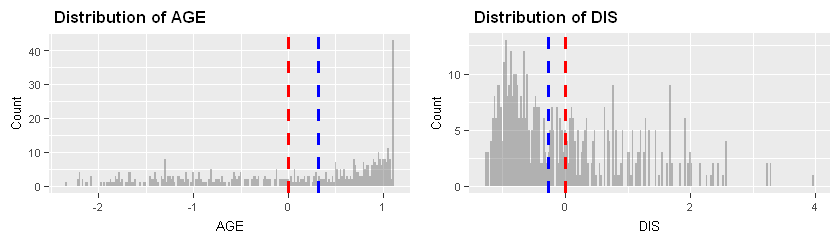

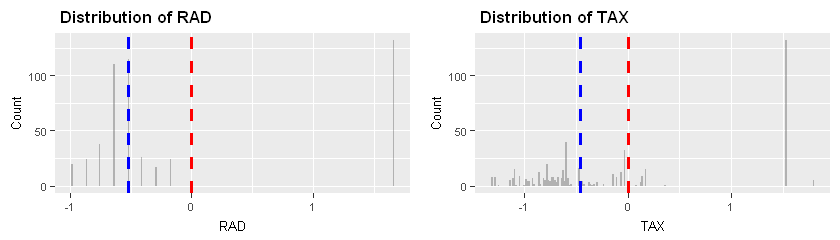

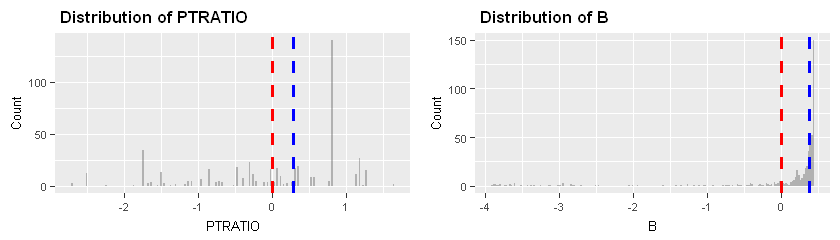

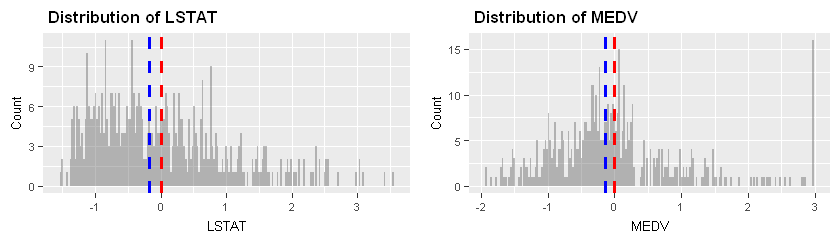

In [92]:
attach(bostonScaled)
special_plot2(CRIM, ZN)
special_plot2(INDUS, CHAS)
special_plot2(NOX, RM)
special_plot2(AGE, DIS)
special_plot2(RAD, TAX)
special_plot2(PTRATIO, B)
special_plot2(LSTAT, MEDV)

Even though this is scaled, the plots overall still look the same. 

### Log Transformation

The following will apply a log transformation to the original data and the standardize it. The log transformation pulls the outliers closer to the mean, and thus, reducing skewness. 

In [97]:
detach(bostonScaled)
bostonLog <- data.frame(scale(log(boston)))
bostonStats['mean_log'] <- sapply(bostonLog, mean)
bostonStats['sd_log'] = sapply(bostonLog, sd)
bostonStats['skewness_log'] <- sapply(bostonLog, skewness)
bostonStats['kurtosis_log'] <- sapply(bostonLog, kurtosis)
bostonStats

feature,mean,sd,skewness,kurtosis,mean_scaled,sd_scaled,skewness_scaled,kurtosis_scaled,mean_log,sd_log,skewness_log,kurtosis_log
CRIM,3.61352356,8.6015451,5.2076524,39.752786,-7.202981e-18,1,5.2076524,39.752786,2.108923e-17,1,0.4047301,1.988418
ZN,11.36363636,23.3224530,2.2190631,6.979949,2.282481e-17,1,2.2190631,6.979949,NaN,NA,NaN,NaN
INDUS,11.13677866,6.8603529,0.2941463,1.766782,1.595296e-17,1,0.2941463,1.766782,-1.846383e-16,1,-0.6412176,2.704633
CHAS,0.06916996,0.2539940,3.3957993,12.531453,-3.544441e-18,1,3.3957993,12.531453,NaN,NA,NaN,NaN
NOX,0.55469506,0.1158777,0.7271442,2.924136,-2.150022e-16,1,0.7271442,2.924136,1.620027e-16,1,0.3567181,2.267447
RM,6.28463439,0.7026171,0.4024147,4.861027,-1.056462e-16,1,0.4024147,4.861027,2.610215e-16,1,-0.2937892,5.695175
AGE,68.57490119,28.1488614,-0.5971856,2.029986,-1.643357e-16,1,-0.5971856,2.029986,-3.868450e-16,1,-1.6706836,5.907332
DIS,3.79504269,2.1057101,1.0087788,3.471299,1.153079e-16,1,1.0087788,3.471299,-1.836978e-17,1,0.1522770,2.011675
RAD,9.54940711,8.7072594,1.0018335,2.129479,4.799652e-17,1,1.0018335,2.129479,-8.751697e-17,1,0.2857667,2.364345
TAX,408.23715415,168.5371161,0.6679683,1.857015,2.024415e-17,1,0.6679683,1.857015,-6.326300e-16,1,0.3295759,1.828057


The following objects are masked from bostonScaled (pos = 3):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from bostonScaled (pos = 4):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from boston (pos = 5):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from boston (pos = 6):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN

The following objects are masked from boston (pos = 7):

    AGE, B, CHAS, CRIM, DIS, INDUS, LSTAT, MEDV, NOX, PTRATIO, RAD, RM,
    TAX, ZN



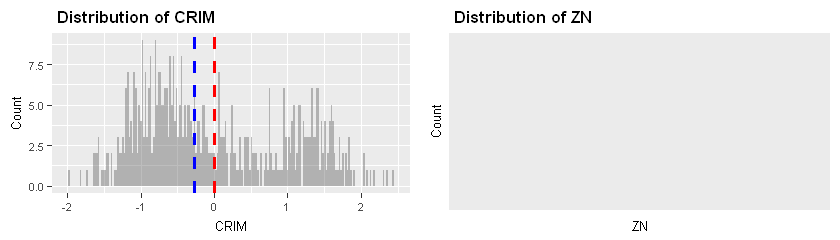

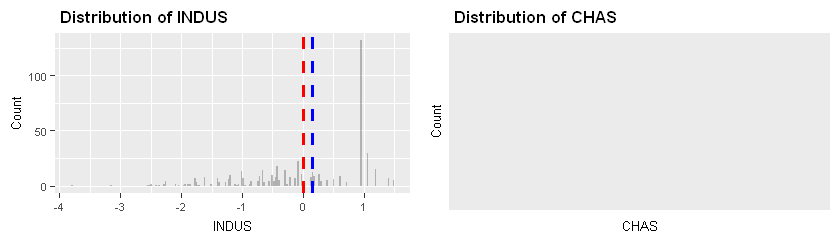

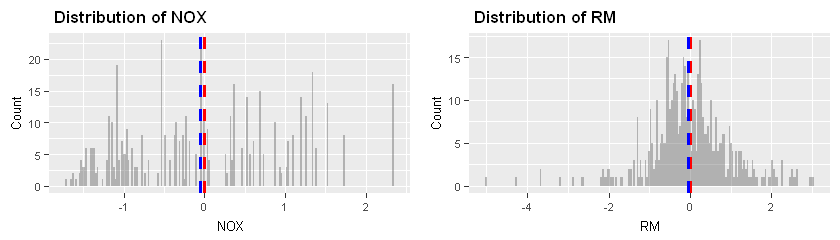

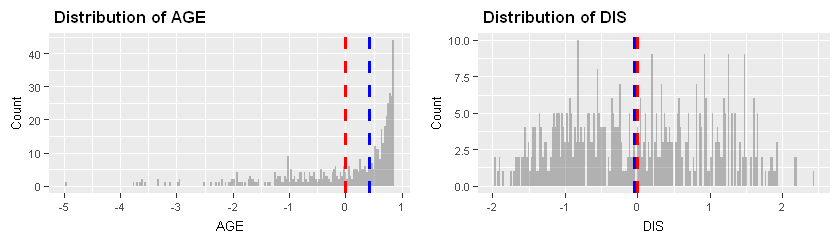

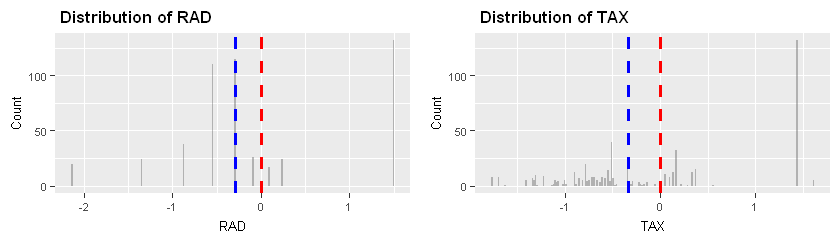

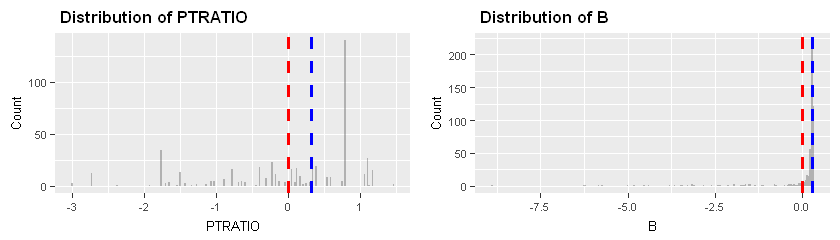

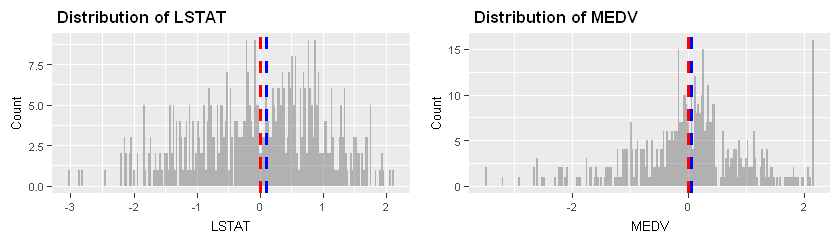

In [98]:
attach(bostonLog)
special_plot2(CRIM, ZN)
special_plot2(INDUS, CHAS)
special_plot2(NOX, RM)
special_plot2(AGE, DIS)
special_plot2(RAD, TAX)
special_plot2(PTRATIO, B)
special_plot2(LSTAT, MEDV)

From the plots, reduced skewness is shown by how much closer the mean and median are to one another. 